There here script will implement the complete Fox algorithm for a specific presentation of a particular graph, with specified permutations, and some graph order. This is deisgned primarily for checking results.

Information on the graph specified first - note that since this is being entered by hand, the number of vertices has to match the number of relators.


In [1]:
# Example 11 in Fox
K=DiGraph({0:[1,1]})
Y=[[2,2,1,-2,-1],[]]
g=3 #order of the cover

In [2]:
# case a in Villani (2021)
K=DiGraph({0:[1],1:[2,3],2:[0,3],3:[0]})
Y=[[-1,2,-5],[3,6,-2],[-3,1,4],[-4,5,-6]]

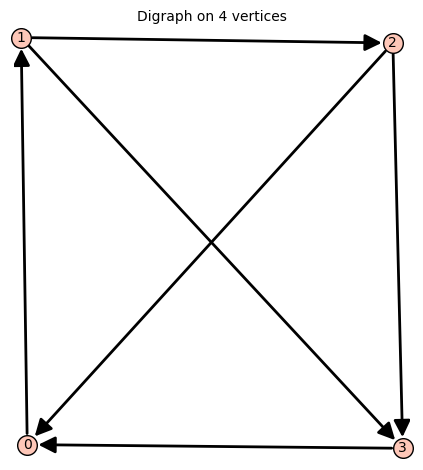

In [3]:
E=K.size()
H=FreeGroup(E) #Initial free group
K

knot group $G=\pi_1(\mathbb{S}^3 - L)$?

In [4]:
G=H/[H(Y[i]) for i in K.vertices()];G

Finitely presented group < x0, x1, x2, x3, x4, x5 | x0^-1*x1*x4^-1, x2*x5*x1^-1, x2^-1*x0*x3, x3^-1*x4*x5^-1 >

Can this group be simplified?

In [5]:
I=G.simplification_isomorphism();I

Generic morphism:
  From: Finitely presented group < x0, x1, x2, x3, x4, x5 | x0^-1*x1*x4^-1, x2*x5*x1^-1, x2^-1*x0*x3, x3^-1*x4*x5^-1 >
  To:   Finitely presented group < x0, x1, x2 |  >
  Defn: x0 |--> x0
        x1 |--> x1
        x2 |--> x2
        x3 |--> x0^-1*x2
        x4 |--> x0^-1*x1
        x5 |--> x2^-1*x1

Since this is a verification code, now we set the permutation labels we want on each edge, picked from the list of available permutations

In [6]:
P=Permutations(g)
for i in P:
    print(i,i.cycle_string())

[1, 2, 3] ()
[1, 3, 2] (2,3)
[2, 1, 3] (1,2)
[2, 3, 1] (1,2,3)
[3, 1, 2] (1,3,2)
[3, 2, 1] (1,3)


In [7]:
PerList=[P[3],P[2],P[5],P[2],P[1],P[3]];PerList

[[2, 3, 1], [2, 1, 3], [3, 2, 1], [2, 1, 3], [1, 3, 2], [2, 3, 1]]

This next block is the word homomorphism, described in Fox (1961), $u \to u_{\alpha}$ for over $\alpha$. This is to make it possible to use the same algorithm on the Schreier condition below. This amounts to simply leaving the order of the cover as a parameter into the function. This spits out the word in the specified cover.

In [8]:
def word_hom(Y,PerList,g,E,i):
    YC=[0 for i in range(len(Y))]
    #print(YC)
    #print(Per)
    for j in range(len(Y)):
        # split into positive and negative cases. 
        Per=Permutations(g).identity()
        if Y[j]>0:
            #print("positive!",j,Y[j])
            k=0
            while k<j:
                #print("------")
                #print(k)
                if Y[k]>0:
                    # Careful - permutations act FROM the right!
                    Per=Per*PerList[abs(Y[k])-1]
                else:
                    Per=Per*(PerList[abs(Y[k])-1].inverse())
                
                k+=1
                
            #print(Per.cycle_string())
            YC[j]=Y[j]+E*(Per(i+1)-1)
        else:
            #print("negative!")
            k=0
            while k<=j:
                #print("--------")
                #print(k)
                if Y[k]>0:
                    Per=Per*PerList[abs(Y[k])-1]
                else:
                    Per=Per*(PerList[abs(Y[k])-1].inverse())
                
                k+=1
                
            #print(Per.cycle_string())
            YC[j]=-1*(abs(Y[j])+E*(Per(i+1)-1))     
            
     
    return YC

In [9]:
YC = []
for i in range(g):
    for j in range(len(Y)):
        YC.append(word_hom(Y[j],PerList,g,E,i)) 

Let's see the relators in the cover:

In [10]:
print(YC)

[[-13, 14, -11], [3, 18, -8], [-15, 13, 4], [-10, 11, -12], [-1, 2, -17], [9, 12, -14], [-9, 7, 16], [-4, 5, -18], [-7, 8, -5], [15, 6, -2], [-3, 1, 10], [-16, 17, -6]]


Need a free group in the cover....

In [11]:
H1=FreeGroup(E*g);H1

Free Group on generators {x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17}

and now we can calculate the fundamental group of the unbranched cover, $\Gamma\star F_{g-1}$, where $\Gamma = \pi_1 (\Sigma-\Lambda)$

In [12]:
G1=H1/[H1(YC[i]) for i in range(len(Y)*g)];G1

Finitely presented group < x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17 | x12^-1*x13*x10^-1, x2*x17*x7^-1, x14^-1*x12*x3, x9^-1*x10*x11^-1, x0^-1*x1*x16^-1, x8*x11*x13^-1, x8^-1*x6*x15, x3^-1*x4*x17^-1, x6^-1*x7*x4^-1, x14*x5*x1^-1, x2^-1*x0*x9, x15^-1*x16*x5^-1 >

Check simplification:

In [13]:
G1.simplification_isomorphism()

Generic morphism:
  From: Finitely presented group < x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17 | x12^-1*x13*x10^-1, x2*x17*x7^-1, x14^-1*x12*x3, x9^-1*x10*x11^-1, x0^-1*x1*x16^-1, x8*x11*x13^-1, x8^-1*x6*x15, x3^-1*x4*x17^-1, x6^-1*x7*x4^-1, x14*x5*x1^-1, x2^-1*x0*x9, x15^-1*x16*x5^-1 >
  To:   Finitely presented group < x0, x1, x2, x3, x4, x5, x10 | x2*x3^-1*x0^-1*x1*x5^-1*x2^-1*x0*x3*x5*x1^-1 >
  Defn: x0 |--> x0
        x1 |--> x1
        x2 |--> x2
        x3 |--> x3
        x4 |--> x4
        x5 |--> x5
        x6 |--> x2*x3^-1
        x7 |--> x2*x3^-1*x4
        x8 |--> x2*x3^-1*x0^-1*x1*x5^-1
        x9 |--> x0^-1*x2
        x10 |--> x10
        x11 |--> x2^-1*x0*x10
        x12 |--> x2*x3^-1*x0^-1*x1*x5^-1*x2^-1*x0
        x13 |--> x2*x3^-1*x0^-1*x1*x5^-1*x2^-1*x0*x10
        x14 |--> x2*x3^-1*x0^-1*x1*x5^-1*x2^-1*x0*x3
        x15 |--> x0^-1*x1*x5^-1
        x16 |--> x0^-1*x1
        x17 |--> x3^-1*x4

Now remove the free group by using a word satisfying the Schreier condition...

In [14]:
SC=[[] for _ in range(g)] # list of words under the homomorphism.
for i in range(g):
    #print(i)
    S=[1 for k in range(i)] # gives a word 1^k for cover k
    #print(S)
    SC[i]=word_hom(S,PerList,g,E,0)

print(SC)

[[], [1], [1, 7]]


Now apply to our presentation to remove the free group and get $\pi_1(\Sigma - \Lambda)$...

In [15]:
Rel=YC+SC
G1=H1/[H1(Rel[i]) for i in range(len(Rel))];G1

Finitely presented group < x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17 | x12^-1*x13*x10^-1, x2*x17*x7^-1, x14^-1*x12*x3, x9^-1*x10*x11^-1, x0^-1*x1*x16^-1, x8*x11*x13^-1, x8^-1*x6*x15, x3^-1*x4*x17^-1, x6^-1*x7*x4^-1, x14*x5*x1^-1, x2^-1*x0*x9, x15^-1*x16*x5^-1, 1, x0, x0*x6 >

Let's do some basic analysis of this group (this generally works, although .structure_description() does not always!)

In [16]:
# structure description doens't work!
#G1.structure_description()
G1.simplification_isomorphism()

Generic morphism:
  From: Finitely presented group < x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17 | x12^-1*x13*x10^-1, x2*x17*x7^-1, x14^-1*x12*x3, x9^-1*x10*x11^-1, x0^-1*x1*x16^-1, x8*x11*x13^-1, x8^-1*x6*x15, x3^-1*x4*x17^-1, x6^-1*x7*x4^-1, x14*x5*x1^-1, x2^-1*x0*x9, x15^-1*x16*x5^-1, 1, x0, x0*x6 >
  To:   Finitely presented group < x1, x2, x4, x8, x10 |  >
  Defn: x0 |--> 1
        x1 |--> x1
        x2 |--> x2
        x3 |--> x2
        x4 |--> x4
        x5 |--> x8^-1*x1
        x6 |--> 1
        x7 |--> x4
        x8 |--> x8
        x9 |--> x2
        x10 |--> x10
        x11 |--> x2^-1*x10
        x12 |--> x8*x2^-1
        x13 |--> x8*x2^-1*x10
        x14 |--> x8
        x15 |--> x8
        x16 |--> x1
        x17 |--> x2^-1*x4

In [17]:
G1.order()

+Infinity

Now we have tro trivialize the generators, again using the word homomorphism from above....identify the generator $i$, and grab the corresponding word word_hom(.....,i!). The trick is that "i" comes from the permutation, which is currently represented as a cycle, not a cycle string...so need some string manipulation for that to work.

So, turn this into a list we can access...each sublist is a list of the permutations for that particular generator.

In [18]:
VV=[]
for i in range(len(PerList)):
    T=[]
    for s in PerList[i].cycle_string(singletons=True):
        #print(s)
        if s=="(":
            V=[]
        elif s==",": # skip it!
            continue
        elif s==")": #end of permutation
            T.append(V)
        else:
            V.append(int(s))

    VV.append(T)
print(VV)

[[[1, 2, 3]], [[1, 2], [3]], [[1, 3], [2]], [[1, 2], [3]], [[1], [2, 3]], [[1, 2, 3]]]


ok....now pass each generator to the homomorphism with the cycle index indicated. Once for each cycle in the permutation! This is another set of relators that need to be applied to the finite group.

In [19]:
GG=[]
for k in range(len(PerList)):
    GEN=[]
    for i in range(len(VV[k])): # each permutation indicates a new relation...
        VVV=[] #this is getting out of hand...
        #print(i)
        for j in range(len(VV[k][i])):
            #print(j,VV[k][i])
            #VVV.append(word_hom([1],PerList,g,E,VV[i][j]-1))
            VVV=VVV+word_hom([k+1],PerList,g,E,VV[k][i][j]-1)
        
        #print(VVV)
        GEN.append(VVV)
    GG=GG+GEN
    #print(GEN)
print(GG)

[[1, 7, 13], [2, 8], [14], [3, 15], [9], [4, 10], [16], [5], [11, 17], [6, 12, 18]]


Combine all the relators....

In [20]:
Rel=YC+SC+GG;Rel

[[-13, 14, -11],
 [3, 18, -8],
 [-15, 13, 4],
 [-10, 11, -12],
 [-1, 2, -17],
 [9, 12, -14],
 [-9, 7, 16],
 [-4, 5, -18],
 [-7, 8, -5],
 [15, 6, -2],
 [-3, 1, 10],
 [-16, 17, -6],
 [],
 [1],
 [1, 7],
 [1, 7, 13],
 [2, 8],
 [14],
 [3, 15],
 [9],
 [4, 10],
 [16],
 [5],
 [11, 17],
 [6, 12, 18]]

Now find the actual fundamental group $\pi_1 (\Sigma)$!

In [21]:
#G1=H1/[H1(YC[0]),H1(YC[1]),H1(YC[2])];G1
G1=H1/[H1(Rel[i]) for i in range(len(Rel))];G1

Finitely presented group < x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17 | x12^-1*x13*x10^-1, x2*x17*x7^-1, x14^-1*x12*x3, x9^-1*x10*x11^-1, x0^-1*x1*x16^-1, x8*x11*x13^-1, x8^-1*x6*x15, x3^-1*x4*x17^-1, x6^-1*x7*x4^-1, x14*x5*x1^-1, x2^-1*x0*x9, x15^-1*x16*x5^-1, 1, x0, x0*x6, x0*x6*x12, x1*x7, x13, x2*x14, x8, x3*x9, x15, x4, x10*x16, x5*x11*x17 >

Some basic analysis - the structure description may fail occasionally here...!

In [22]:
G1.order()

1

In [23]:
G1.simplification_isomorphism()

Generic morphism:
  From: Finitely presented group < x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17 | x12^-1*x13*x10^-1, x2*x17*x7^-1, x14^-1*x12*x3, x9^-1*x10*x11^-1, x0^-1*x1*x16^-1, x8*x11*x13^-1, x8^-1*x6*x15, x3^-1*x4*x17^-1, x6^-1*x7*x4^-1, x14*x5*x1^-1, x2^-1*x0*x9, x15^-1*x16*x5^-1, 1, x0, x0*x6, x0*x6*x12, x1*x7, x13, x2*x14, x8, x3*x9, x15, x4, x10*x16, x5*x11*x17 >
  To:   Finitely presented group <  |  >
  Defn: x0 |--> 1
        x1 |--> 1
        x2 |--> 1
        x3 |--> 1
        x4 |--> 1
        x5 |--> 1
        x6 |--> 1
        x7 |--> 1
        x8 |--> 1
        x9 |--> 1
        x10 |--> 1
        x11 |--> 1
        x12 |--> 1
        x13 |--> 1
        x14 |--> 1
        x15 |--> 1
        x16 |--> 1
        x17 |--> 1

In [24]:
G1.structure_description()

'1'